In [1]:
import pygmt
import numpy as np
import pandas as pd

In [11]:
path = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path + 'M6_catalog_2004-2024.csv', dtype = str)
bsm_mda = pd.read_csv(path + 'bsm_metadata.csv')

# bsm_mda

In [12]:
# Longitudes between -110 and -130

na_stas = bsm_mda.loc[(bsm_mda['LONG'] <= -110) & (bsm_mda['LONG'] >= -130)]
# na_stas

In [14]:
eq_prewdata = earthquakes[~earthquakes['time'].str.contains('2004')]
eq_wdata = eq_prewdata[~eq_prewdata['time'].str.contains('2005')]
# eq_wdata

In [ ]:
# Original earthquake query bounds: 30 to 51.25 lat, -130.51 to -115

In [15]:
psmeca_file = path + 'psmeca_formatted.txt'

In [20]:
psmeca = np.genfromtxt(psmeca_file, dtype = 'str')
psmeca_depths = psmeca[:,2].astype(float)
pygmt.makecpt(cmap="viridis", series=[psmeca_depths.min(), psmeca_depths.max()], reverse = True, output = '/Users/sydneydybing/StrainProject/2024/depth_cpt.cpt')

psmeca_mags = np.genfromtxt(path + 'psmeca_mags.txt', dtype = float)
pygmt.makecpt(cmap="viridis", series=[psmeca_mags.min(), psmeca_mags.max()+0.3], reverse = True, output = path + 'mag_cpt.cpt')

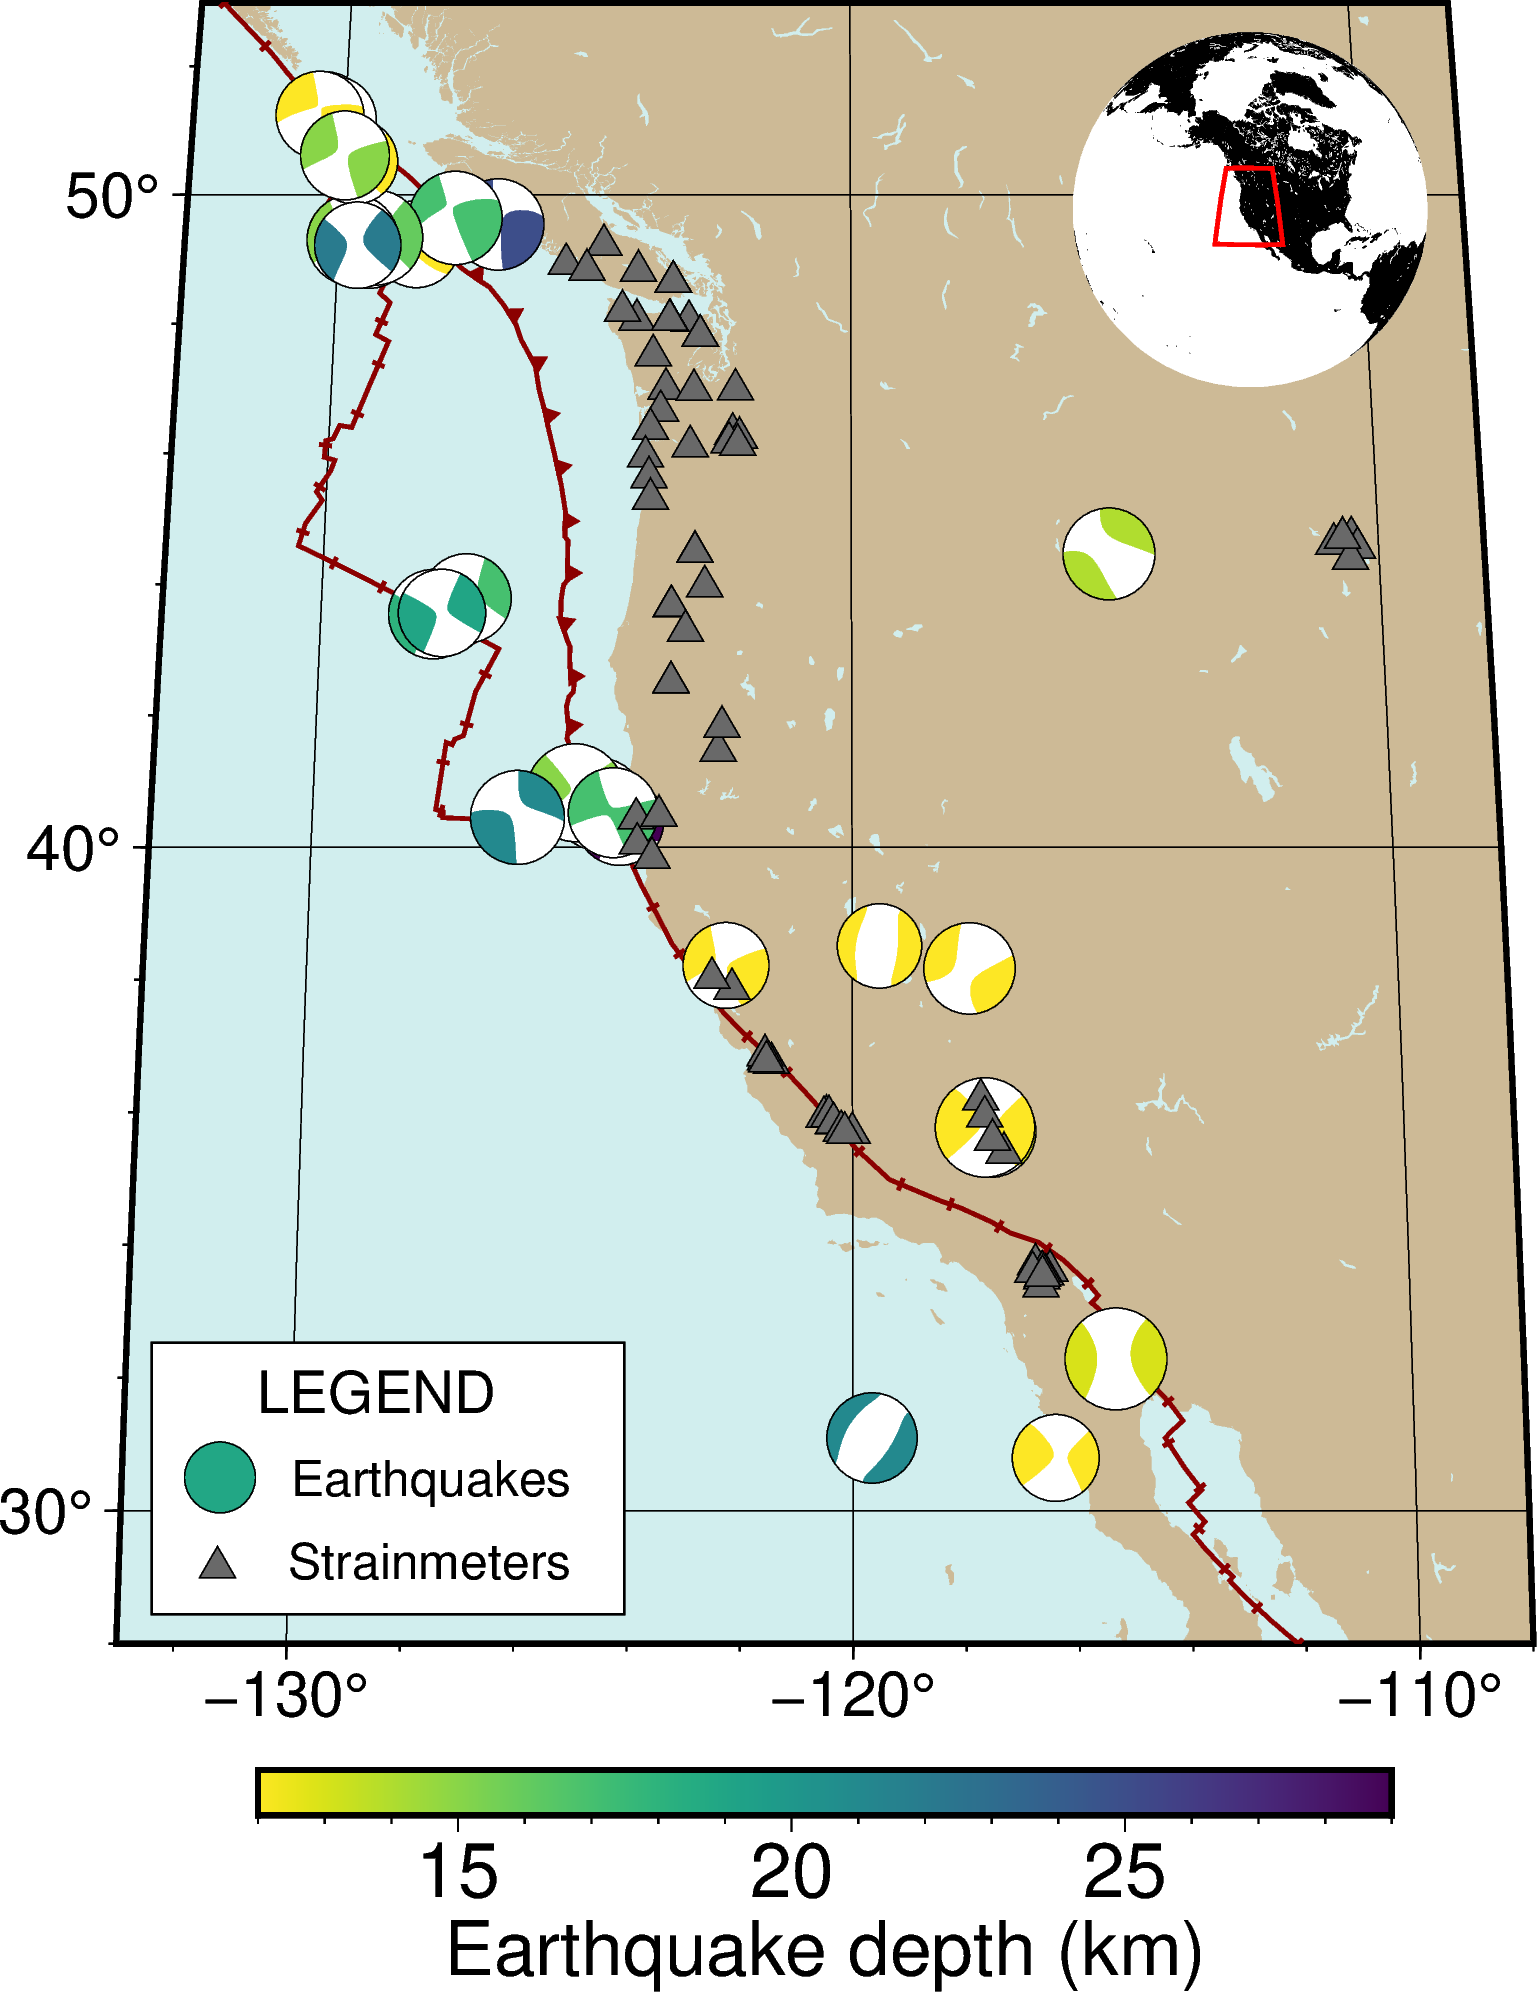

In [25]:
# All North American earthquakes

circ = False
fm = True

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region = [-133,-108,28,53]
fig.coast(region = region, projection = 'N12c', land = 'wheat3', water = 'lightcyan2', frame = 'afg') # Coastline
fig.plot(data = path + 'PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred') # Plate boundaries

# Plot earthquakes

if circ:
    fig.plot(x = eq_wdata.longitude.astype(float), y = eq_wdata.latitude.astype(float), style = 'c0.7c', fill = eq_wdata.mag.astype(float), cmap = path + 'mag_cpt.cpt', pen = 'black', transparency = 20)
    with pygmt.config(FONT = '18'):
        fig.colorbar(frame = 'af+lEarthquake magnitude', cmap = path + 'mag_cpt.cpt')
    
# Focal mechanisms

if fm:
    fig.meca(spec = psmeca_file, convention = 'mt', scale = '0.6c', cmap = path + 'depth_cpt.cpt')
    with pygmt.config(FONT = '18'):
        fig.colorbar(frame = 'af+lEarthquake depth (km)', cmap = path + 'depth_cpt.cpt')

# Plot stations 

fig.plot(x = na_stas.LONG, y = na_stas.LAT, style = 't0.35c', fill = 'dimgrey', pen = 'black') # Symbols
# fig.text(x = na_stas.LONG+1, y = na_stas.LAT, text = na_stas.BNUM, font = '6p,black') # Labels

# Make legend

with fig.inset(position = 'jBL+w4c/2.3c+o0.3c/0.25c', box = '+p0.5+gwhite'):
    pass
fig.plot(x = -131.25, y = 30.5, fill = '#22a785', pen = 'black', style = 'c0.6c') 
fig.text(text = ['Earthquakes'], x = -127.5, y = 30.5, font = '12p,black')
fig.plot(x = -131.25, y = 29.15, fill = 'dimgrey', pen = 'black', style = 't0.35c')
fig.text(text = ['Strainmeters'], x = -127.5, y = 29.25, font = '12p,black')
fig.text(text = ['LEGEND'], x = -128.5, y = 31.8, font = '14p,black')

# Add inset map

with fig.inset(position = 'jTR+w3c+o0.9c/0.25c'):
    fig.coast(projection = 'G-120/40/3c', land = 'black', water = 'white')
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = 'r+s', pen = '1p,red')

# Show or save 

fig.show();

fig.savefig(path + 'figures/NA_earthquake_station_map_fmscoloredbydepth.pdf');